In [8]:

medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve
import pandas as pd
urlretrieve(medical_charges_url,'medical.csv')
medical_df = pd.read_csv("medical.csv")
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

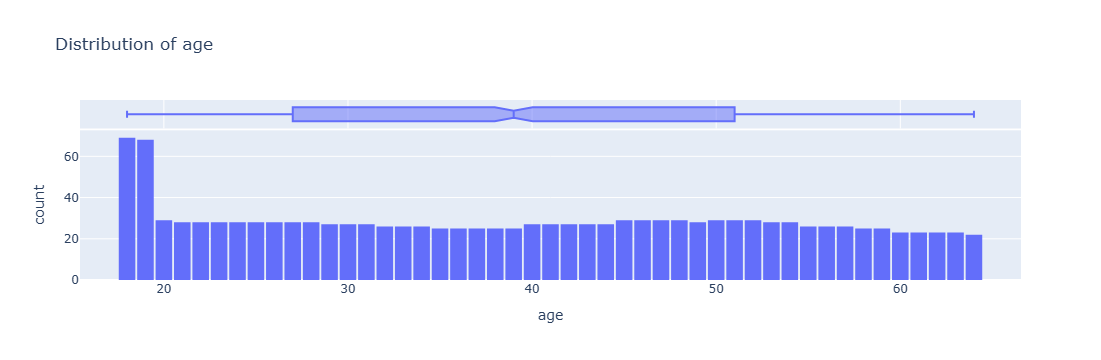

In [60]:
fig = px.histogram(medical_df,
                  x = "age",
                  marginal = "box",
                  nbins = 47,  #64-18+1 = 47 
                  title = "Distribution of age")
fig.update_layout(bargap = 0.1)
fig.show()

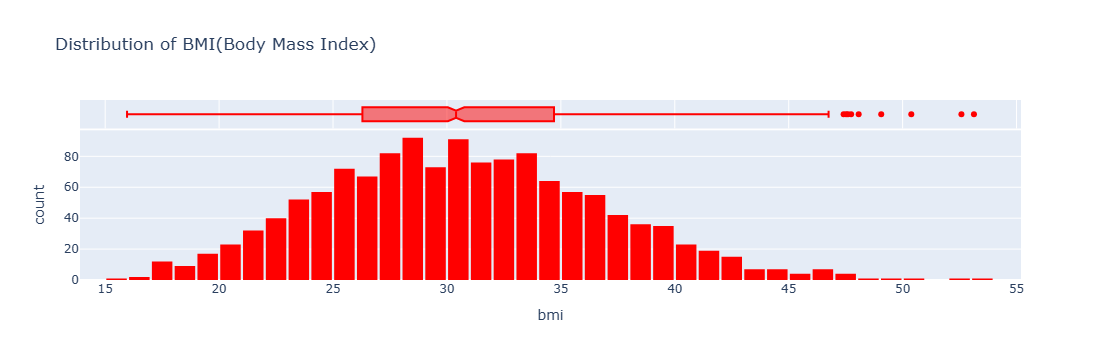

In [90]:
fig = px.histogram(medical_df,
                  x = "bmi",
                  marginal = "box",
                  color_discrete_sequence = ["red"], 
                  title = "Distribution of BMI(Body Mass Index)" )
fig.update_layout(bargap = 0.1)
fig.show()

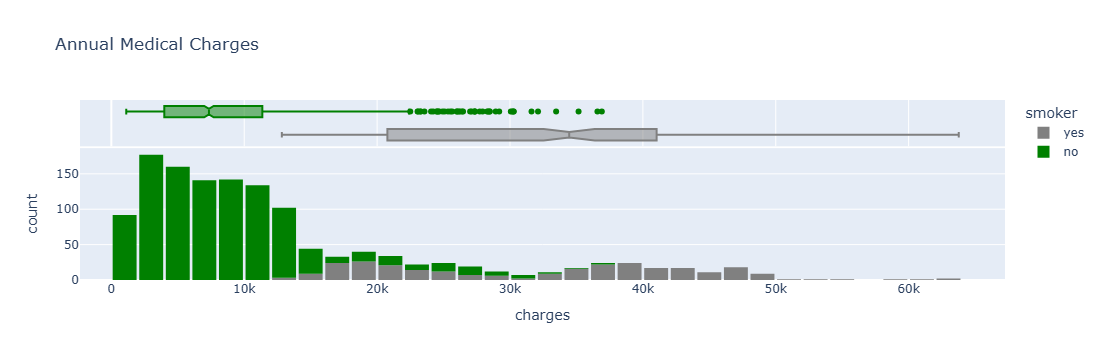

In [78]:
fig = px.histogram(medical_df,
                  x="charges",
                  marginal = "box",
                  color = "smoker",
                  color_discrete_sequence = ["grey","green"],
                  title = "Annual Medical Charges")
fig.update_layout(bargap = 0.1)
fig.show()

In [84]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

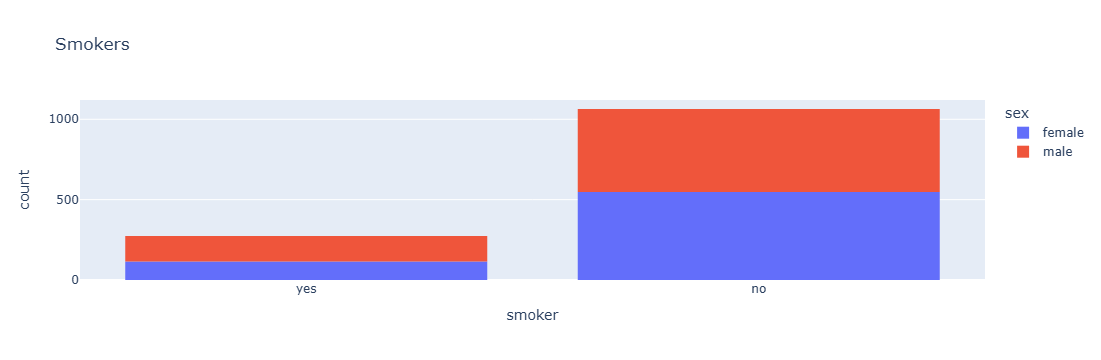

In [100]:
px.histogram(medical_df,
            x="smoker",
            color = "sex",
            title = "Smokers")

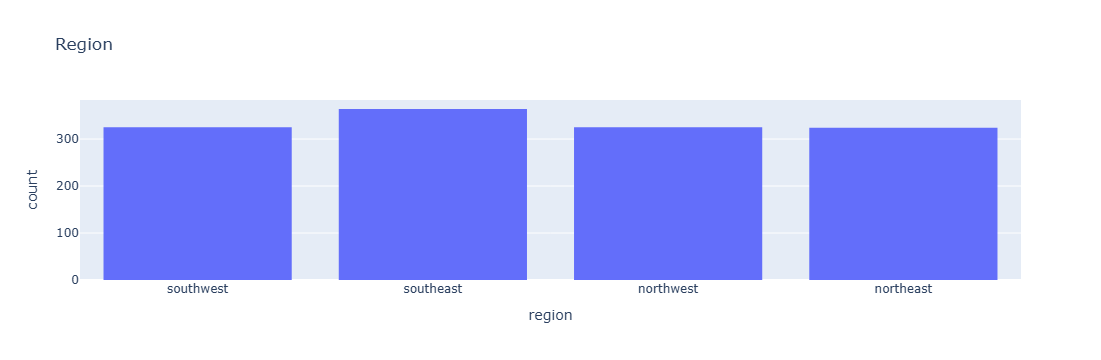

In [106]:
px.histogram(medical_df,
            x = "region",
            title = "Region")

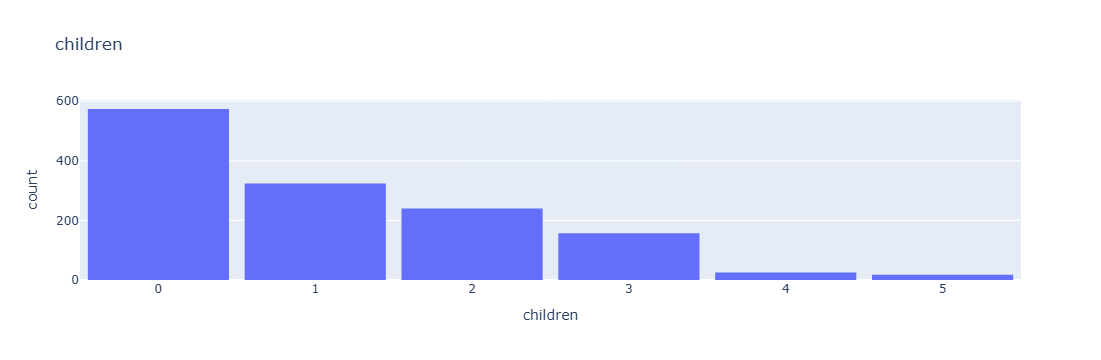

In [110]:
fig = px.histogram(medical_df,
            x= "children",
            title = "children")
fig.update_layout(bargap = 0.1)
fig.show()

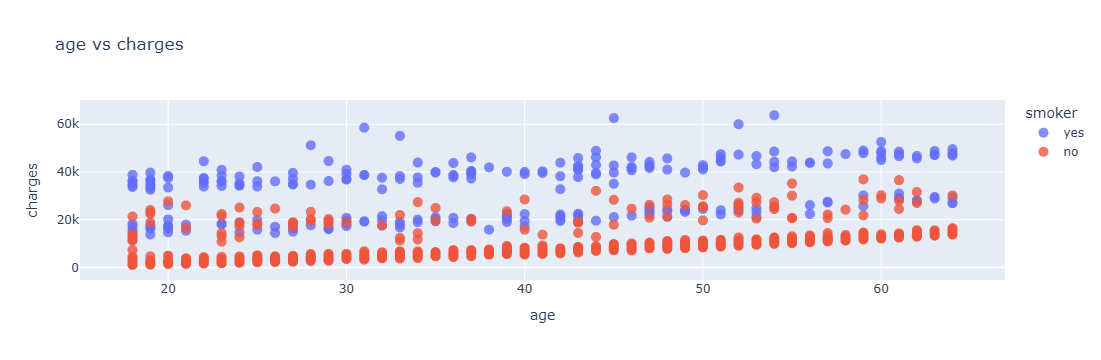

In [130]:
fig = px.scatter(medical_df,
                x="age",
                y="charges",
                color = "smoker",
                hover_data = "sex",
                opacity = 0.8, 
                title = "age vs charges")
fig.update_traces(marker_size = 10)
fig.show()

In [132]:
medical_df.charges.corr(medical_df.age)

0.29900819333064765

In [134]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362892

In [136]:
medical_df.charges.corr(medical_df.children)

0.06799822684790487

In [145]:
smoker_values = {"no" : 0, "yes" : 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984772

In [149]:
sex_values = {"female" : 0,"male" : 1}
sex_numeric = medical_df.sex.map(sex_values)
medical_df.charges.corr(sex_numeric)

0.057292062202025415

In [157]:
medical_df.corr(numeric_only= True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


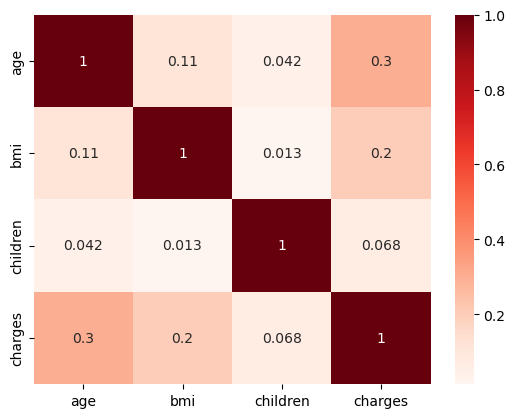

<Figure size 5000x5000 with 0 Axes>

In [183]:
sns.heatmap(medical_df.corr(numeric_only= True), cmap = 'Reds',annot = True)
plt.figure(figsize=(50,50))
plt.show()

In [185]:
non_smoker_df = medical_df[medical_df.smoker == "no"]
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


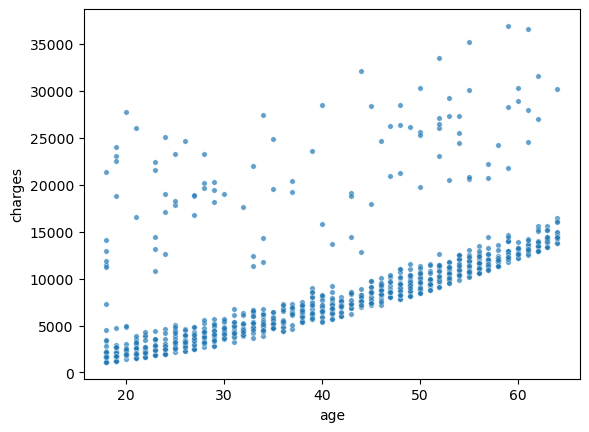

In [203]:
sns.scatterplot(non_smoker_df,x="age" , y= "charges" ,alpha =0.7, s=15)
plt.show()

In [327]:
def estimate_charges(age,w,b) :
    return w * age + b

In [357]:
import numpy as np


In [359]:
def rmse(targets,predictions) :
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [430]:
def try_parameters(w,b) :
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    estimated_charges = estimate_charges(ages,w,b)
    
    plt.plot(ages,estimated_charges,"r")
    plt.scatter(ages,target,s=5)
    plt.legend(["Age","Charges"])
    plt.show()
    targets = non_smoker_df.charges
    predicted = estimate_charges(non_smoker_df.age,w,b)
    
    print("Loss : ",rmse(targets,predicted))
    

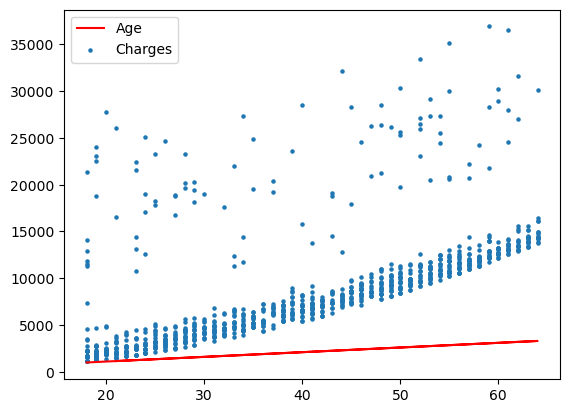

Loss :  8461.949562575493


In [432]:
try_parameters(50,100)

In [454]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [456]:
inputs = non_smoker_df[["age"]]
targets = non_smoker_df.charges
print(inputs.shape)
print(targets.shape)

(1064, 1)
(1064,)


In [458]:
model.fit(inputs,targets)

LinearRegression()

In [572]:
model.predict(np.array([[23],[37],[61]]))

C:\Users\prati\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



ValueError: X has 1 features, but LinearRegression is expecting 9 features as input.

In [462]:
predictions = model.predict(inputs)
rmse(targets,predictions)

4662.505766636395

In [464]:
model.coef_

array([267.24891283])

In [466]:
model.intercept_

-2091.4205565650827

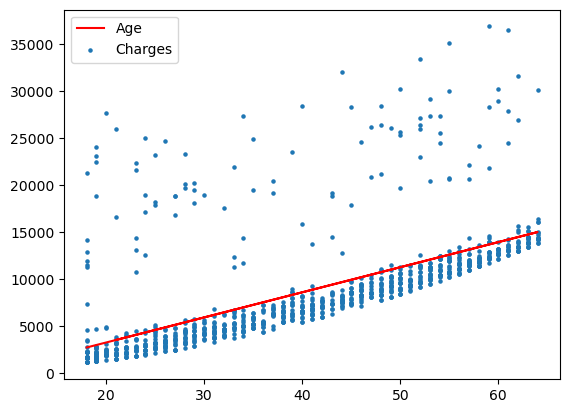

Loss :  4662.505766636395


In [468]:
try_parameters(model.coef_,model.intercept_)

In [490]:
inputs,targets = non_smoker_df[["age","bmi","children"]],non_smoker_df[["charges"]]
model.fit(inputs,targets)
predictions = model.predict(inputs)
loss = rmse(targets,predictions)
print("Loss :",loss)

Loss : 4608.470405038246


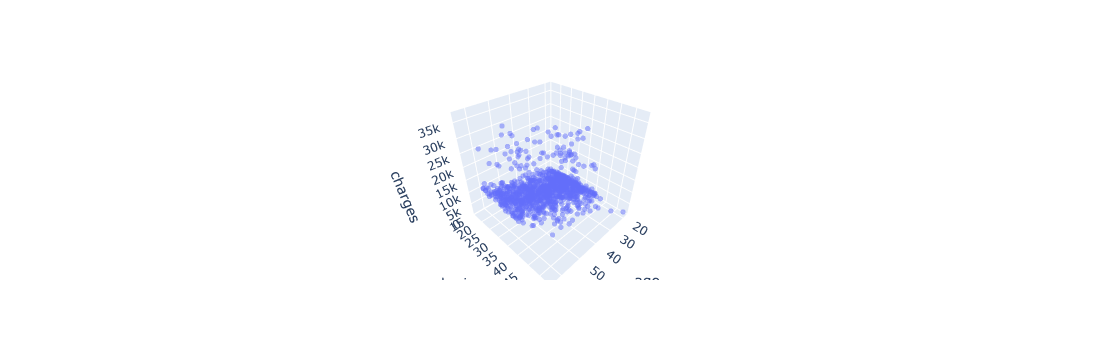

In [488]:
fig = px.scatter_3d(non_smoker_df, x= "age",y="bmi",z="charges")
fig.update_traces(marker_size = 3,marker_opacity=0.5)
fig.show()

In [496]:
inputs,targets = medical_df[["age","bmi","children"]],medical_df[["charges"]]
model.fit(inputs,targets)
predictions = model.predict(inputs)
loss = rmse(targets,predictions)
print("Loss :",loss)

Loss : 11355.317901125973


In [502]:
smoker_codes = {"no" : 0, "yes" : 1}
medical_df["smoker_code"] = medical_df.smoker.map(smoker_codes)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [504]:
sex_codes = {"male" : 0,"female" : 1}
medical_df["sex_code"] = medical_df.sex.map(sex_codes)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1
1335,18,female,36.850,0,no,southeast,1629.83350,0,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1


In [506]:
from sklearn import preprocessing 
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[["region"]])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [508]:
one_hot = enc.transform(medical_df[["region"]]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [510]:
medical_df[["northeast","northwest","southeast","southwest"]] = one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0.0,0.0,0.0,1.0


In [540]:
inputs = medical_df[["age","bmi","children","smoker_code","sex_code","northeast","northwest","southeast","southwest"]]
target = medical_df.charges
model.fit(inputs,target)
predictions = model.predict(inputs)
loss = rmse(target.values,predictions)
print("Loss : ",loss)

Loss :  6041.6796511744515


In [552]:
weights_df = pd.DataFrame({
    "feature" : np.append(inputs.columns,1),
    "Weight"  : np.append(model.coef_,model.intercept_)
})
weights_df.sort_values("Weight",ascending=False)

,feature,Weight
3,smoker_code,23848.534542
5,northeast,587.009235
2,children,475.500545
1,bmi,339.193454
0,age,256.856353
6,northwest,234.045336
4,sex_code,131.314359
8,southwest,-373.041756
7,southeast,-448.012814
9,1,-12656.862171


In [556]:
from sklearn.preprocessing import StandardScaler

In [560]:
numeric_col = ["age","bmi","children"]
scaler = StandardScaler()
scaler.fit(medical_df[numeric_col])

StandardScaler()

In [562]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [564]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])